# Bot Classification - OSRS

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import pandas as pd
import numpy as np
%matplotlib inline


In [2]:
import seaborn as sns
from scipy import stats

## Cleaning The Data

In [3]:
player_df = pd.read_csv('./data/player_data_04-2020.csv')
print('original shape: {}'.format(player_df.shape))
player_df = player_df.drop_duplicates(subset="Name")
print('shape after removing duplicates: {}'.format(player_df.shape))
player_df = player_df[player_df['Overall'] != -1]
print('shape after removing failed hiscores: {}'.format(player_df.shape))
player_df.head()

original shape: (2429, 41)
shape after removing duplicates: (2320, 41)
shape after removing failed hiscores: (2227, 41)


,Name,Equip1,Equip2,Equip3,Equip4,Equip5,Equip6,Equip7,Equip8,Equip9,...,Mining,Herblore,Agility,Thieving,Slayer,Farming,Runecrafting,Hunter,Construction,Location
0,Aweb0kz,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,60,1,1,1,1,1,1,1,1,ge
1,Popeye2018,-1,-1,1660,853,-1,-1,-1,1099,-1,...,83,1,10,1,1,1,30,1,1,ge
2,ImFatNotCute,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,41,30,25,20,63,17,9,1,1,ge
3,PappoSeco,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,41,1,1,1,1,1,1,1,1,ge
4,GB Justin,-1,-1,-1,1381,-1,-1,-1,-1,-1,...,1,1,37,19,33,1,1,1,27,ge


In [4]:
player_df['Location'].value_counts()

ge             773
lumbridge      467
attack         410
mining         351
woodcutting    146
fishing         80
Name: Location, dtype: int64

In [5]:
f2p_array = ['Attack', 'Defence', 'Strength','Hitpoints', 'Ranged', 'Prayer', 'Magic', 'Cooking', 'Woodcutting',\
           'Runecrafting', 'Fishing', 'Firemaking', 'Crafting', 'Smithing', 'Mining']

player_df.columns

Index(['Name', 'Equip1', 'Equip2', 'Equip3', 'Equip4', 'Equip5', 'Equip6',
       'Equip7', 'Equip8', 'Equip9', 'Equip10', 'Equip11', 'Equip12', 'Loc_x',
       'Loc_y', 'Anim_id', 'Overall', 'Attack', 'Defence', 'Strength',
       'Hitpoints', 'Ranged', 'Prayer', 'Magic', 'Cooking', 'Woodcutting',
       'Fletching', 'Fishing', 'Firemaking', 'Crafting', 'Smithing', 'Mining',
       'Herblore', 'Agility', 'Thieving', 'Slayer', 'Farming', 'Runecrafting',
       'Hunter', 'Construction', 'Location'],
      dtype='object')

## Exploring The Full Dataset (currently only skills)

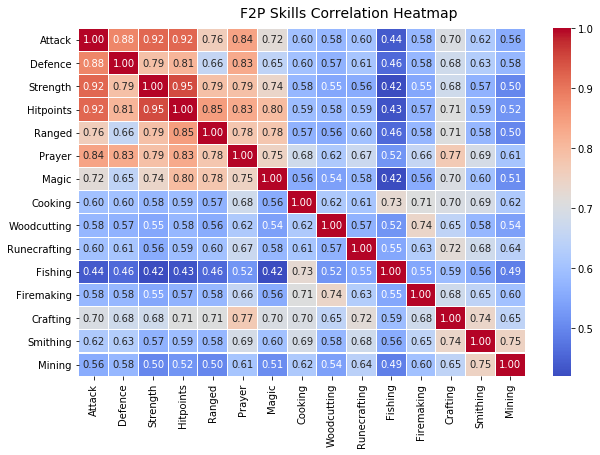

In [6]:
full_df = player_df[f2p_array]

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = full_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('F2P Skills Correlation Heatmap', fontsize=14)

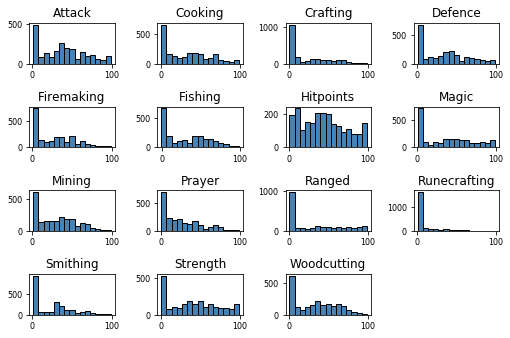

In [7]:
full_df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

C:\Users\User\Anaconda3\envs\banbot\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


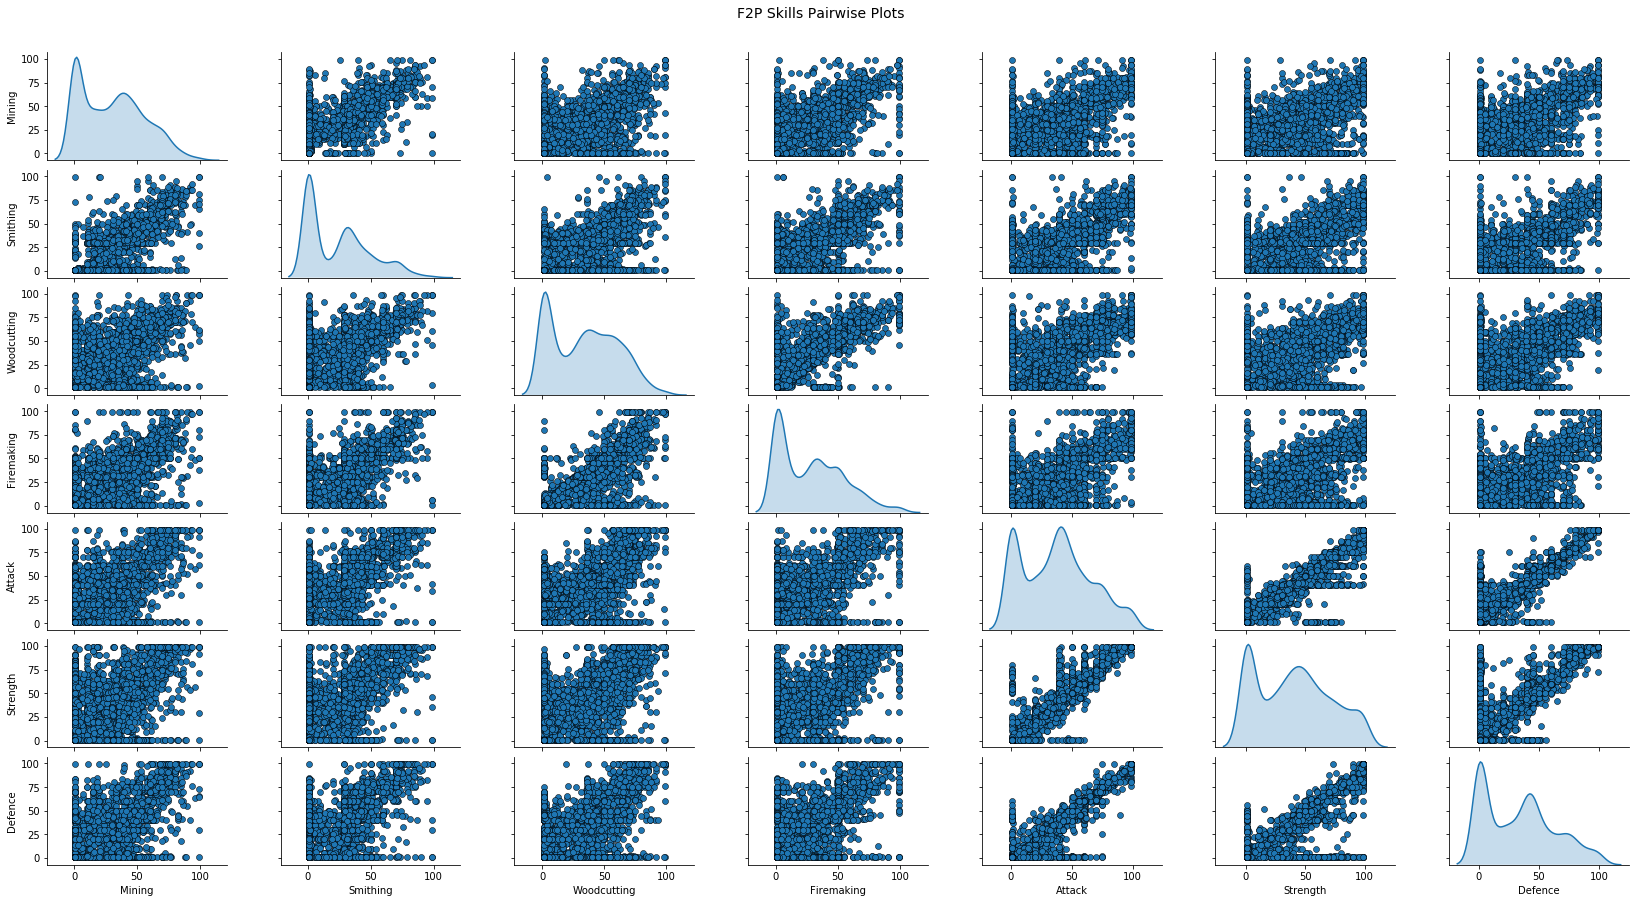

In [8]:
# Pair-wise Scatter Plots
cols = ['Mining', 'Smithing', 'Woodcutting', 'Firemaking', 'Attack', 'Strength', 'Defence']
pp = sns.pairplot(full_df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('F2P Skills Pairwise Plots', fontsize=14)

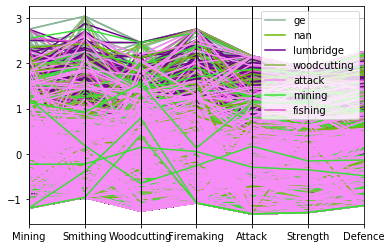

In [9]:
# Scaling attribute values to avoid few outliers
cols = ['Mining', 'Smithing', 'Woodcutting', 'Firemaking', 'Attack', 'Strength', 'Defence']
subset_df = full_df[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, player_df['Location']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'Location')

Text(0, 0.5, 'Wine Alcohol %')

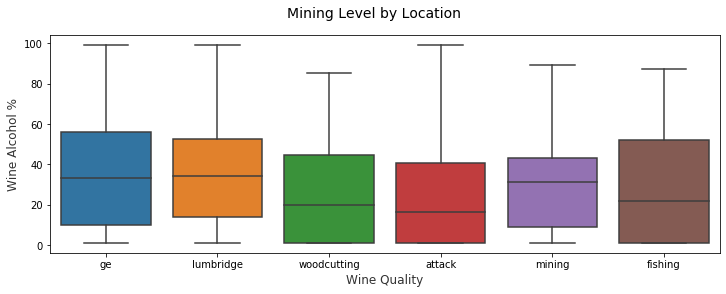

In [19]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Mining Level by Location', fontsize=14)

sns.boxplot(x="Location", y="Mining", data=player_df,  ax=ax)
ax.set_xlabel("Location",size = 12,alpha=0.8)
ax.set_ylabel("Level",size = 12,alpha=0.8)

## Exploring Skilling vs Chilling Areas

(1124, 41)


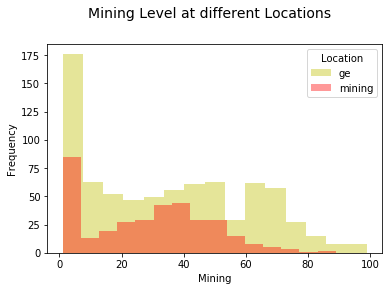

In [78]:
skill_areas = ["woodcutting", "attack", "mining", "fishing"]
chill_areas = ["ge", "lumbridge"]

split_df = player_df.loc[player_df['Location'].isin(['mining', 'ge'])]
split_df = split_df.reset_index(drop=True)
print(split_df.shape)

# Using multiple Histograms 
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Mining Level at different Locations", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Mining Level")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(split_df, hue='Location', palette={"mining": "r", "ge": "y"})
g.map(sns.distplot, 'Mining', kde=False, bins=15, ax=ax)
ax.legend(title='Location')
plt.close(2)

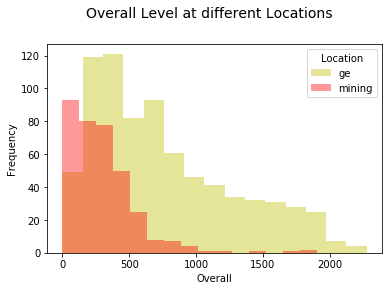

In [79]:
# Using multiple Histograms 
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Overall Level at different Locations", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Overall Level")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(split_df, hue='Location', palette={"mining": "r", "ge": "y"})
g.map(sns.distplot, 'Overall', kde=False, bins=15, ax=ax)
ax.legend(title='Location')
plt.close(2)

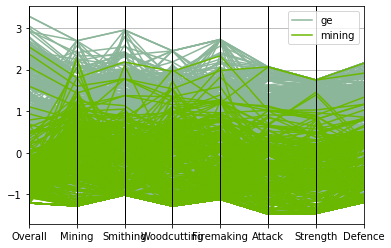

In [80]:
# Scaling attribute values to avoid few outliers
cols = ['Overall', 'Mining', 'Smithing', 'Woodcutting', 'Firemaking', 'Attack', 'Strength', 'Defence']
subset_df = split_df[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, split_df['Location']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'Location')

C:\Users\User\Anaconda3\envs\banbot\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


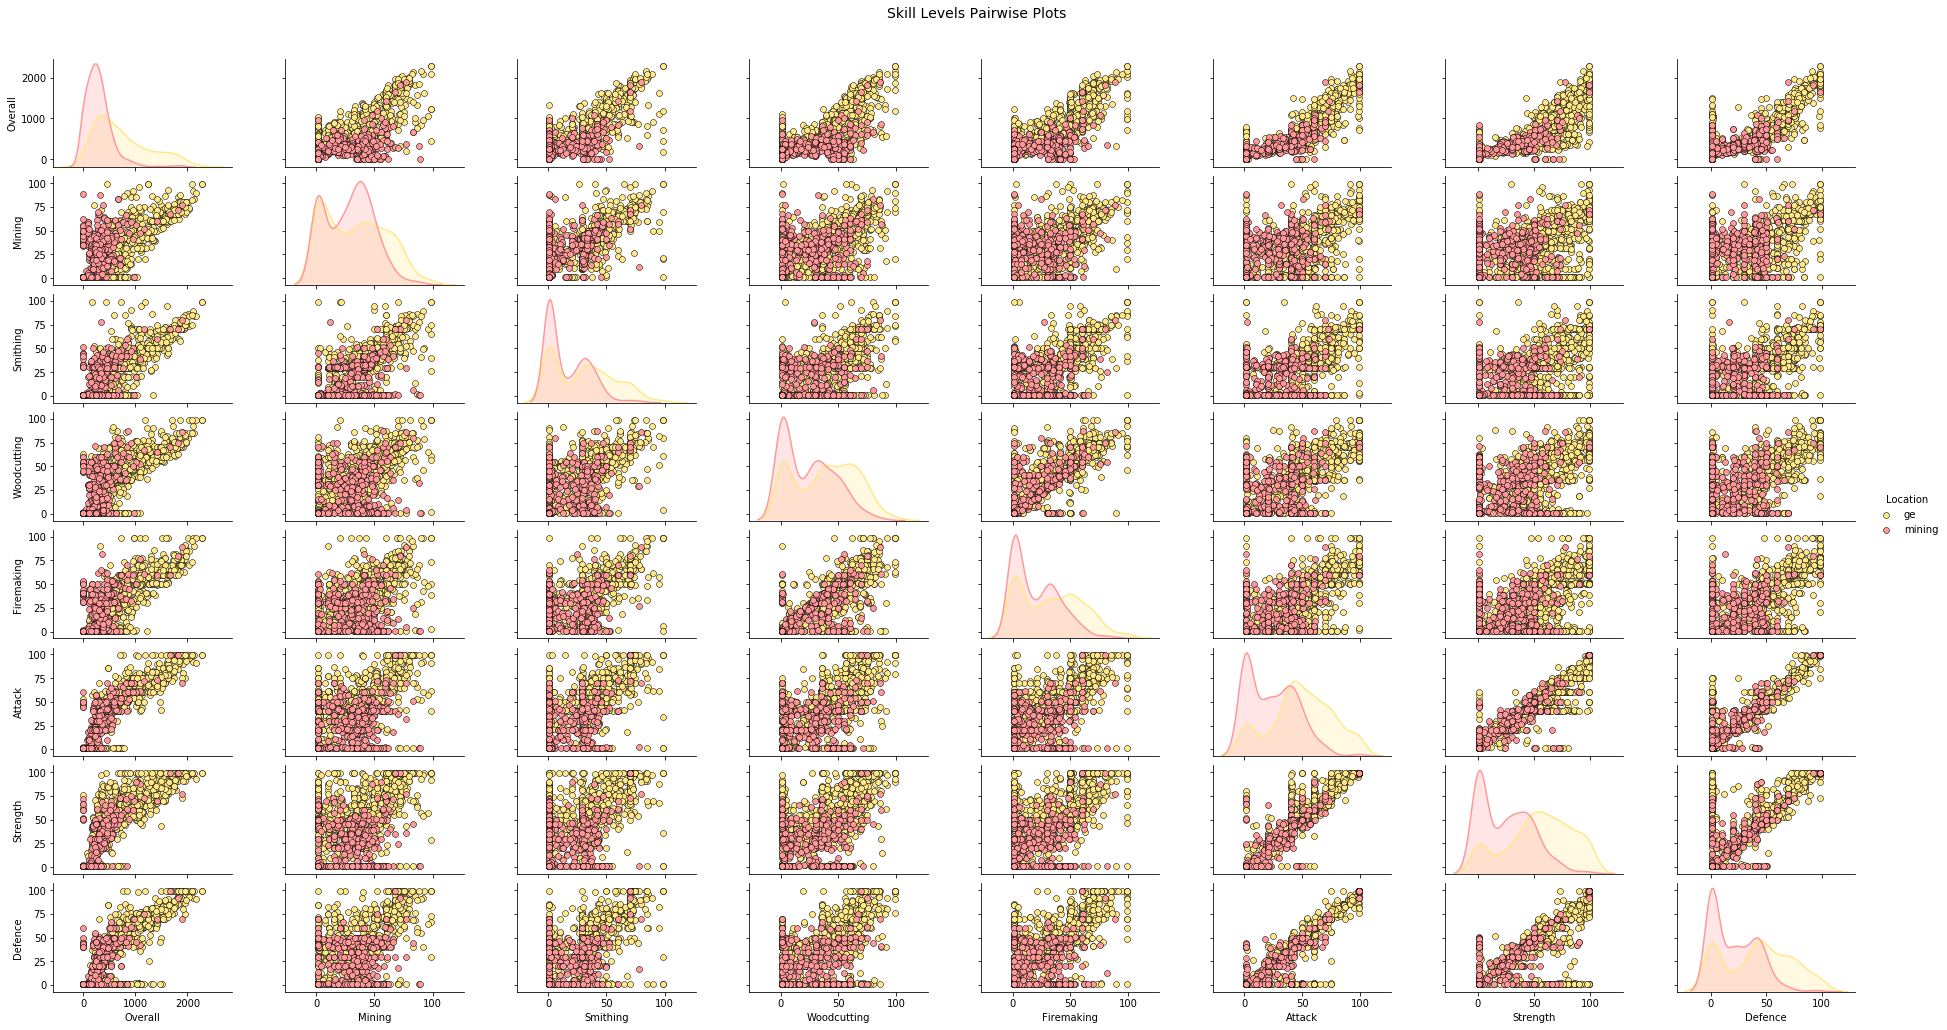

In [81]:
# Scatter Plot with Hue for visualizing data in 3-D
cols = ['Overall', 'Mining', 'Smithing', 'Woodcutting', 'Firemaking', 'Attack', 'Strength', 'Defence', 'Location']
subset_df = split_df[cols]
pp = sns.pairplot(subset_df, hue='Location', size=1.8, aspect=1.8, 
                  palette={"mining": "#FF9999", "ge": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Skill Levels Pairwise Plots', fontsize=14)

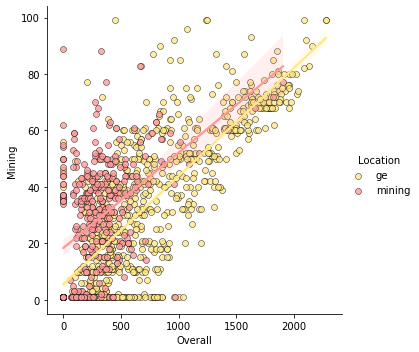

In [82]:
# we can also view relationships\correlations as needed                  
lp = sns.lmplot(x='Overall', y='Mining', hue='Location', 
                palette={"mining": "#FF9999", "ge": "#FFE888"},
                data=subset_df, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))       

In [84]:
cols = ['Overall', 'Mining', 'Smithing', 'Woodcutting', 'Firemaking', 'Attack', 'Strength', 'Defence']
subset_df = split_df[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, split_df['Location']], axis=1)
print(final_df.shape)

melted_skill_df = pd.melt(final_df, id_vars=['Location'], value_vars=['Overall', 'Mining', 'Smithing', 'Woodcutting', 'Firemaking', 'Attack', 'Strength', 'Defence'])
melted_skill_df

700         ge
701         ge
702         ge
703         ge
704         ge
         ...  
1119    mining
1120    mining
1121    mining
1122    mining
1123    mining
Name: Location, Length: 424, dtype: object
(1124, 9)


KeyError: 700

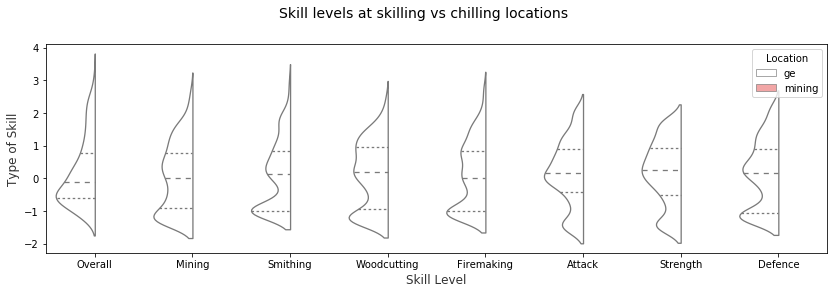

In [40]:
fig = plt.figure(figsize = (14, 4))
title = fig.suptitle("Skill levels at skilling vs chilling locations", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax2 = fig.add_subplot(1,1, 1)
sns.violinplot(x='variable', y='value', hue='Location', 
               data=melted_skill_df, split=True, inner="quart", linewidth=1.3,
               palette={"mining": "#FF9999", "ge": "white"})
ax2.set_xlabel("Skill Level",size = 12,alpha=0.8)
ax2.set_ylabel("Type of Skill",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Location')

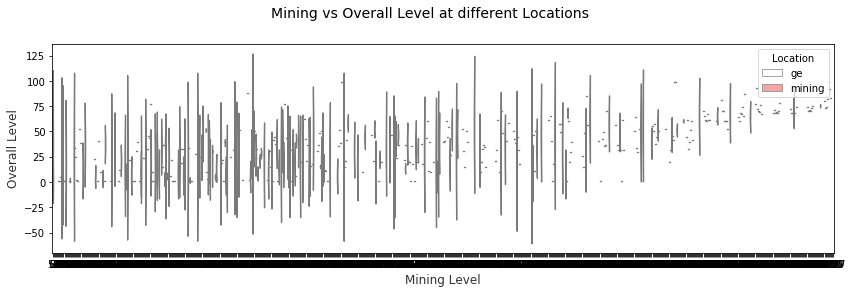

In [31]:
# # Visualizing 3-D mix data using violin plots
# # leveraging the concepts of hue and axes for > 1 categorical dimensions
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
# f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

# sns.violinplot(x="Overall", y="Mining",
#                data=subset_df, inner="quart", linewidth=1.3,ax=ax1)
# ax1.set_xlabel("Mining Level",size = 12,alpha=0.8)
# ax1.set_ylabel("Overall Level",size = 12,alpha=0.8)

# fig = plt.figure(figsize = (14, 4))
# title = fig.suptitle("Mining vs Overall Level at different Locations", fontsize=14)
# fig.subplots_adjust(top=0.85, wspace=0.3)
# ax2 = fig.add_subplot(1,1, 1)
# sns.violinplot(x='Overall', y='Mining', hue='Location', 
#                data=subset_df, split=True, inner="quart", linewidth=1.3,
#                palette={"mining": "#FF9999", "ge": "white"})
# ax2.set_xlabel("Mining Level",size = 12,alpha=0.8)
# ax2.set_ylabel("Overall Level",size = 12,alpha=0.8)
# l = plt.legend(loc='upper right', title='Location')

# TESTING ZONE

In [ ]:
player_df['Magic'].round(decimals=-1).value_counts().sort_index(ascending=True)

In [ ]:
player_df['Mining'].round(decimals=-1).value_counts().sort_index(ascending=True).plot.bar()

In [ ]:
ge_df = player_df.loc[player_df['Location'] == 'ge']

print(ge_df.shape)
ge_df.head()

In [ ]:
ge_df['Mining'].round(decimals=-1).value_counts().sort_index(ascending=True).plot.bar()

In [ ]:
mining_df = player_df.loc[player_df['Location'] == 'mining']

print(mining_df.shape)
mining_df.head()

In [ ]:
mining_df['Mining'].round(decimals=-1).value_counts().sort_index(ascending=True).plot.bar()

In [ ]:
mining_df['Mining'].hist()

In [ ]:
mining_df[f2p_array].hist(color='k', alpha=0.5, bins=10)

In [ ]:
for skill in f2p_array:
    print("{}: {}".format(skill, mining_df[skill].value_counts()[1]))